<a href="https://colab.research.google.com/github/arunravi8595/CE802/blob/main/Assignment/CE802_P3_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import keras
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [75]:
#Load Data - CE802_P2_Data
dataset = pd.read_csv('https://raw.githubusercontent.com/arunravi8595/CE802/main/CE802_P3_Data.csv')
test_dataset = pd.read_csv('https://raw.githubusercontent.com/arunravi8595/CE802/main/CE802_P3_Test.csv')

In [76]:
dataset.shape

(1500, 17)

In [77]:
#Find null values in data
dataset.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
Target    0
dtype: int64

In [78]:
dataset.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,11.85,-258.09,-6.95,2557.29,Low,Europe,7.59,-28.22,-259.22,-1578.12,-141.76,9,6,20.19,169.26,1.64,999.41
1,11.99,-169.71,-16.06,2862.87,Low,Rest,2.57,-13.76,-321.80,-1914.16,-165.83,6,6,9.51,6259.05,0.08,0.00
2,3.48,-317.76,-8.14,2175.81,Medium,UK,1.60,-32.76,-253.54,457.12,-203.87,15,10,7.02,38504.82,6.40,266.29
3,14.75,-394.26,-5.61,1927.86,Low,UK,7.33,-13.42,-149.86,-1972.04,-145.52,6,10,33.99,20883.90,21.98,598.77
4,10.25,-365.46,-10.33,3187.98,High,USA,4.37,-32.66,-224.58,-2022.36,-153.94,12,10,4.29,12095.91,2167.48,396.90


In [79]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   object 
 5   F6      1500 non-null   object 
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   int64  
 12  F13     1500 non-null   int64  
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   float64
 15  F16     1500 non-null   float64
 16  Target  1500 non-null   float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB


In [80]:
dataset.describe()

,F1,F2,F3,F4,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,10.757127,-336.287880,-7.285153,2671.684440,4.054593,-19.753333,-213.443933,-1334.077107,-158.306867,11.842000,7.885333,12.124980,7073.884980,127.205547,922.082533
std,3.024250,87.920436,3.040026,889.404292,2.906426,8.366284,59.715228,602.841367,42.241393,5.510107,3.620072,8.681726,13329.106617,1548.308592,1092.331874
min,1.330000,-643.650000,-16.990000,-310.650000,0.040000,-52.260000,-450.880000,-3435.840000,-348.810000,0.000000,0.000000,0.120000,-53986.650000,0.000000,0.000000
25%,8.640000,-394.380000,-9.265000,2063.797500,1.907500,-23.710000,-253.540000,-1752.225000,-179.380000,9.000000,6.000000,5.835000,365.310000,0.260000,0.000000
50%,10.760000,-333.870000,-7.390000,2663.205000,3.370000,-19.790000,-213.350000,-1326.910000,-158.245000,12.000000,8.000000,10.245000,7070.715000,2.020000,429.570000
75%,12.880000,-277.350000,-5.330000,3286.702500,5.472500,-15.970000,-171.710000,-932.380000,-138.307500,15.000000,10.000000,16.477500,13207.140000,13.610000,1530.205000
max,19.780000,-67.230000,2.780000,5864.370000,22.570000,35.480000,-3.000000,718.020000,122.660000,33.000000,20.000000,70.170000,66359.040000,54949.060000,3960.010000


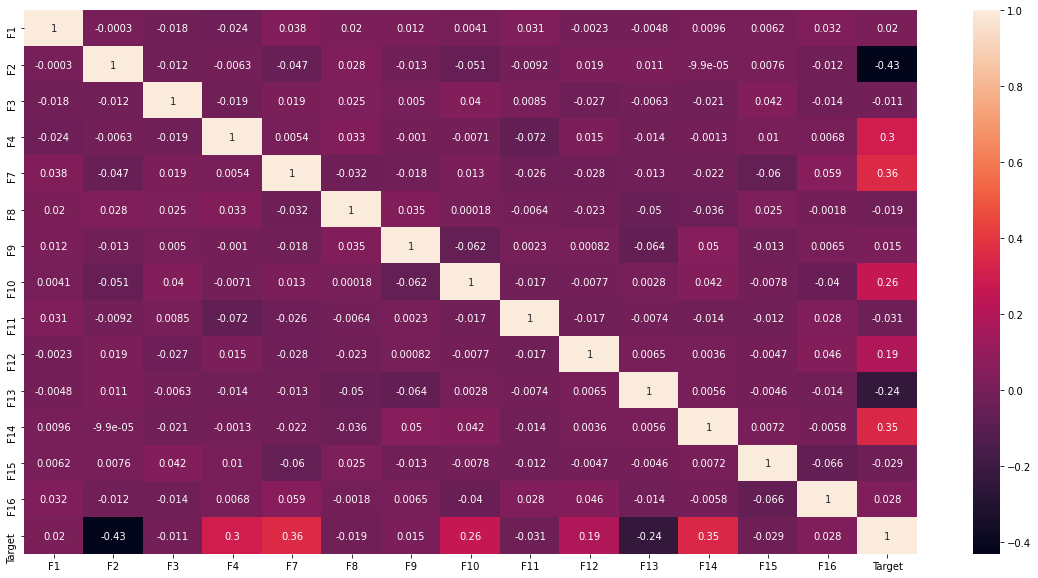

In [81]:
#Plotting Correlation
plt.figure(figsize=(20,10))
correlation=dataset.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

In [82]:
dataset.nunique()

F1         839
F2        1405
F3         833
F4        1488
F5           5
F6           4
F7         728
F8         905
F9        1399
F10       1492
F11       1411
F12         12
F13         11
F14        737
F15       1500
F16        703
Target    1051
dtype: int64

In [83]:
dataset.describe(include=np.object)

,F5,F6
count,1500,1500
unique,5,4
top,Very low,USA
freq,312,407


In [84]:
# Droping duplicate rows with different values
dataset.drop_duplicates(subset=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16'])

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,11.85,-258.09,-6.95,2557.29,Low,Europe,7.59,-28.22,-259.22,-1578.12,-141.76,9,6,20.19,169.26,1.64,999.41
1,11.99,-169.71,-16.06,2862.87,Low,Rest,2.57,-13.76,-321.80,-1914.16,-165.83,6,6,9.51,6259.05,0.08,0.00
2,3.48,-317.76,-8.14,2175.81,Medium,UK,1.60,-32.76,-253.54,457.12,-203.87,15,10,7.02,38504.82,6.40,266.29
3,14.75,-394.26,-5.61,1927.86,Low,UK,7.33,-13.42,-149.86,-1972.04,-145.52,6,10,33.99,20883.90,21.98,598.77
4,10.25,-365.46,-10.33,3187.98,High,USA,4.37,-32.66,-224.58,-2022.36,-153.94,12,10,4.29,12095.91,2167.48,396.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,10.76,-334.23,-5.23,2312.88,Very high,Europe,5.76,-30.72,-234.28,-1379.02,-159.49,12,6,19.47,-3117.27,1.66,2369.29
1496,13.86,-239.55,-3.43,2701.47,Very high,UK,3.58,-14.06,-341.86,-961.20,-104.42,18,4,19.23,12181.83,0.14,814.47
1497,8.60,-501.84,-4.61,2650.62,Very low,USA,7.59,-8.64,-253.54,-1545.54,-168.67,12,12,2.73,7133.10,0.28,1692.40
1498,5.44,-354.51,-9.24,2808.60,Very low,UK,4.14,-27.08,-262.86,-809.42,-143.74,18,8,18.36,-34949.13,53.30,635.49


(array([491., 492., 327., 110.,  54.,  11.,  10.,   2.,   1.,   2.]),
 array([ 0.12 ,  7.125, 14.13 , 21.135, 28.14 , 35.145, 42.15 , 49.155,
        56.16 , 63.165, 70.17 ]),
 <a list of 10 Patch objects>)

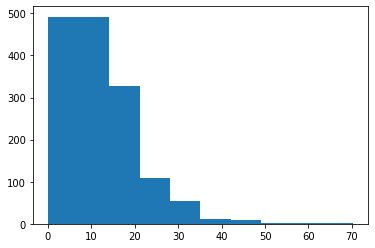

In [85]:
# checking sample distribution
plt.hist(dataset.F14)

In [86]:
#Find upper limit using SD
upper_limit = dataset.F14.mean() + 4*dataset.F14.std()
upper_limit

46.85188236438431

In [87]:
# Find lower limit using SD
lower_limit =dataset.F14.mean() - 4*dataset.F14.std()
lower_limit

-22.60192236438436

In [88]:
# check outliers
dataset[(dataset.F14>upper_limit) | (dataset.F14<lower_limit)]

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
379,8.86,-221.94,-9.05,2728.08,High,UK,1.09,-13.70,-310.02,-1041.02,-155.18,12,10,48.27,-5017.02,0.24,698.75
388,10.37,-374.79,-9.05,3198.90,Very high,Europe,0.83,-31.56,-286.04,-2918.80,-165.25,9,10,56.94,30967.23,0.00,2653.71
643,11.24,-450.57,-3.35,4119.93,Medium,UK,1.23,-23.02,-177.08,-1031.00,-112.18,21,2,70.17,21084.33,0.00,3960.01
648,18.30,-258.06,-7.79,1708.47,Very low,Europe,4.10,-13.72,-247.56,-1597.70,-144.84,6,6,48.63,5607.30,0.14,1115.28
847,13.18,-137.94,-6.76,3900.78,Medium,USA,3.89,-15.46,-166.76,-690.02,-131.03,9,6,52.83,13392.96,7.18,3655.07
1032,6.78,-410.19,-8.52,2328.45,Very low,USA,1.87,-18.76,-208.74,-824.80,-156.78,3,14,66.48,4973.07,0.42,3591.35
1429,13.69,-279.03,-8.79,2103.93,Low,USA,6.11,-21.48,-128.94,-454.52,-192.36,12,4,51.51,-5352.93,0.50,3774.02


In [89]:
#Training dataset
dataset[dataset.F14 > upper_limit] = dataset.F14.median()

In [90]:
#Test dataset
test_dataset[test_dataset.F14 > upper_limit] = test_dataset.F14.median()

In [91]:
dataset.describe()

,F1,F2,F3,F4,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,10.749990,-334.818390,-7.201803,2658.339890,4.089657,-19.613723,-212.379363,-1328.324057,-157.553977,11.841810,7.898477,11.909570,7030.162830,127.247703,909.164883
std,3.014373,90.741556,3.263815,905.776986,2.932728,8.603124,61.488259,607.468278,43.744539,5.498318,3.614128,8.116853,13309.876407,1548.305272,1083.294685
min,1.330000,-643.650000,-16.990000,-310.650000,0.040000,-52.260000,-450.880000,-3435.840000,-348.810000,0.000000,0.000000,0.120000,-53986.650000,0.000000,0.000000
25%,8.647500,-394.282500,-9.265000,2056.237500,1.920000,-23.700000,-253.490000,-1751.540000,-179.330000,9.000000,6.000000,5.835000,193.995000,0.275000,0.000000
50%,10.720000,-333.510000,-7.375000,2659.950000,3.390000,-19.780000,-213.020000,-1325.030000,-158.165000,12.000000,8.000000,10.237500,7055.400000,2.050000,420.670000
75%,12.860000,-276.442500,-5.277500,3283.627500,5.540000,-15.890000,-171.115000,-927.350000,-137.950000,15.000000,10.000000,16.335000,13160.610000,13.610000,1515.975000
max,19.780000,10.245000,10.245000,5864.370000,22.570000,35.480000,10.245000,718.020000,122.660000,33.000000,20.000000,46.650000,66359.040000,54949.060000,3798.890000


In [92]:
#Training dataset
one_hot = pd.get_dummies(dataset['F6'])

In [93]:
#Test dataset
one_hot_test = pd.get_dummies(test_dataset['F6'])

In [94]:
# Join encoded dataframe
dataset = dataset.join(one_hot)
dataset

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,10.245000000000001,Europe,Rest,UK,USA
0,11.85,-258.09,-6.95,2557.29,Low,Europe,7.59,-28.22,-259.22,-1578.12,-141.76,9.0,6.0,20.19,169.26,1.64,999.41,0,1,0,0,0
1,11.99,-169.71,-16.06,2862.87,Low,Rest,2.57,-13.76,-321.80,-1914.16,-165.83,6.0,6.0,9.51,6259.05,0.08,0.00,0,0,1,0,0
2,3.48,-317.76,-8.14,2175.81,Medium,UK,1.60,-32.76,-253.54,457.12,-203.87,15.0,10.0,7.02,38504.82,6.40,266.29,0,0,0,1,0
3,14.75,-394.26,-5.61,1927.86,Low,UK,7.33,-13.42,-149.86,-1972.04,-145.52,6.0,10.0,33.99,20883.90,21.98,598.77,0,0,0,1,0
4,10.25,-365.46,-10.33,3187.98,High,USA,4.37,-32.66,-224.58,-2022.36,-153.94,12.0,10.0,4.29,12095.91,2167.48,396.90,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,10.76,-334.23,-5.23,2312.88,Very high,Europe,5.76,-30.72,-234.28,-1379.02,-159.49,12.0,6.0,19.47,-3117.27,1.66,2369.29,0,1,0,0,0
1496,13.86,-239.55,-3.43,2701.47,Very high,UK,3.58,-14.06,-341.86,-961.20,-104.42,18.0,4.0,19.23,12181.83,0.14,814.47,0,0,0,1,0
1497,8.60,-501.84,-4.61,2650.62,Very low,USA,7.59,-8.64,-253.54,-1545.54,-168.67,12.0,12.0,2.73,7133.10,0.28,1692.40,0,0,0,0,1
1498,5.44,-354.51,-9.24,2808.60,Very low,UK,4.14,-27.08,-262.86,-809.42,-143.74,18.0,8.0,18.36,-34949.13,53.30,635.49,0,0,0,1,0


In [95]:
# Join the encoded test dataset
test_dataset = test_dataset.join(one_hot_test)
test_dataset

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,10.11,Europe,Rest,UK,USA
0,11.23,-195.54,-1.19,1468.56,Very high,USA,8.97,-23.62,-249.36,-854.18,-155.20,12.0,10.0,12.39,-3480.87,0.04,NaN,0,0,0,0,1
1,14.89,-426.24,-1.18,3049.08,Very high,USA,6.33,-39.26,-226.26,-2126.68,-159.42,9.0,8.0,5.19,8831.19,43.68,NaN,0,0,0,0,1
2,6.76,-493.47,-13.55,3197.13,Very low,USA,1.77,-25.84,-238.30,-2270.78,-212.73,12.0,10.0,3.30,-4468.44,0.52,NaN,0,0,0,0,1
3,15.12,-320.04,-12.17,2436.00,Very low,Rest,5.42,-17.32,-203.64,-304.24,-100.34,18.0,12.0,6.51,22851.60,758.54,NaN,0,0,1,0,0
4,10.12,-387.99,-7.11,2800.89,Very low,Europe,1.39,-12.78,-265.16,-1419.76,-137.49,0.0,14.0,14.22,24396.09,0.68,NaN,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6.04,-308.37,-12.30,4346.82,High,USA,8.96,-18.28,-266.14,-3132.76,-91.62,9.0,8.0,15.63,-1231.92,8.32,NaN,0,0,0,0,1
1496,14.13,-280.62,-6.00,2600.13,Very high,Europe,2.70,-0.80,-101.86,-1305.60,-147.74,18.0,18.0,13.23,7516.71,0.78,NaN,0,1,0,0,0
1497,13.03,-301.05,-5.22,2279.07,Very low,Rest,0.23,-17.06,-168.30,-1413.06,-102.67,0.0,14.0,8.58,9689.01,4.80,NaN,0,0,1,0,0
1498,3.29,-347.40,-7.19,1985.31,Very low,Europe,2.63,-22.20,-299.66,-1183.62,-118.93,6.0,8.0,6.21,-2832.51,0.46,NaN,0,1,0,0,0


In [96]:
#droping unwanted columns
dataset = dataset.drop({'F6','USA',10.245000000000001},axis = 1)

In [97]:
dataset

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,Europe,Rest,UK
0,11.85,-258.09,-6.95,2557.29,Low,7.59,-28.22,-259.22,-1578.12,-141.76,9.0,6.0,20.19,169.26,1.64,999.41,1,0,0
1,11.99,-169.71,-16.06,2862.87,Low,2.57,-13.76,-321.80,-1914.16,-165.83,6.0,6.0,9.51,6259.05,0.08,0.00,0,1,0
2,3.48,-317.76,-8.14,2175.81,Medium,1.60,-32.76,-253.54,457.12,-203.87,15.0,10.0,7.02,38504.82,6.40,266.29,0,0,1
3,14.75,-394.26,-5.61,1927.86,Low,7.33,-13.42,-149.86,-1972.04,-145.52,6.0,10.0,33.99,20883.90,21.98,598.77,0,0,1
4,10.25,-365.46,-10.33,3187.98,High,4.37,-32.66,-224.58,-2022.36,-153.94,12.0,10.0,4.29,12095.91,2167.48,396.90,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,10.76,-334.23,-5.23,2312.88,Very high,5.76,-30.72,-234.28,-1379.02,-159.49,12.0,6.0,19.47,-3117.27,1.66,2369.29,1,0,0
1496,13.86,-239.55,-3.43,2701.47,Very high,3.58,-14.06,-341.86,-961.20,-104.42,18.0,4.0,19.23,12181.83,0.14,814.47,0,0,1
1497,8.60,-501.84,-4.61,2650.62,Very low,7.59,-8.64,-253.54,-1545.54,-168.67,12.0,12.0,2.73,7133.10,0.28,1692.40,0,0,0
1498,5.44,-354.51,-9.24,2808.60,Very low,4.14,-27.08,-262.86,-809.42,-143.74,18.0,8.0,18.36,-34949.13,53.30,635.49,0,0,1


In [98]:
test_dataset = test_dataset.drop({'F6','USA','Target',10.11},axis = 1)

In [99]:
cleanup_Assortment = {"F5": {"Very low": 0, "Low": 1, "Medium": 2,"High":3,"Very high":4}}
dataset.replace(cleanup_Assortment, inplace = True)

In [100]:
dataset

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,Europe,Rest,UK
0,11.85,-258.09,-6.95,2557.29,1.0,7.59,-28.22,-259.22,-1578.12,-141.76,9.0,6.0,20.19,169.26,1.64,999.41,1,0,0
1,11.99,-169.71,-16.06,2862.87,1.0,2.57,-13.76,-321.80,-1914.16,-165.83,6.0,6.0,9.51,6259.05,0.08,0.00,0,1,0
2,3.48,-317.76,-8.14,2175.81,2.0,1.60,-32.76,-253.54,457.12,-203.87,15.0,10.0,7.02,38504.82,6.40,266.29,0,0,1
3,14.75,-394.26,-5.61,1927.86,1.0,7.33,-13.42,-149.86,-1972.04,-145.52,6.0,10.0,33.99,20883.90,21.98,598.77,0,0,1
4,10.25,-365.46,-10.33,3187.98,3.0,4.37,-32.66,-224.58,-2022.36,-153.94,12.0,10.0,4.29,12095.91,2167.48,396.90,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,10.76,-334.23,-5.23,2312.88,4.0,5.76,-30.72,-234.28,-1379.02,-159.49,12.0,6.0,19.47,-3117.27,1.66,2369.29,1,0,0
1496,13.86,-239.55,-3.43,2701.47,4.0,3.58,-14.06,-341.86,-961.20,-104.42,18.0,4.0,19.23,12181.83,0.14,814.47,0,0,1
1497,8.60,-501.84,-4.61,2650.62,0.0,7.59,-8.64,-253.54,-1545.54,-168.67,12.0,12.0,2.73,7133.10,0.28,1692.40,0,0,0
1498,5.44,-354.51,-9.24,2808.60,0.0,4.14,-27.08,-262.86,-809.42,-143.74,18.0,8.0,18.36,-34949.13,53.30,635.49,0,0,1


In [101]:
cleanup_Assortment = {"F5": {"Very low": 0, "Low": 1, "Medium": 2,"High":3,"Very high":4}}
test_dataset.replace(cleanup_Assortment, inplace = True)

In [102]:
test_dataset

,F1,F2,F3,F4,F5,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Europe,Rest,UK
0,11.23,-195.54,-1.19,1468.56,4.0,8.97,-23.62,-249.36,-854.18,-155.20,12.0,10.0,12.39,-3480.87,0.04,0,0,0
1,14.89,-426.24,-1.18,3049.08,4.0,6.33,-39.26,-226.26,-2126.68,-159.42,9.0,8.0,5.19,8831.19,43.68,0,0,0
2,6.76,-493.47,-13.55,3197.13,0.0,1.77,-25.84,-238.30,-2270.78,-212.73,12.0,10.0,3.30,-4468.44,0.52,0,0,0
3,15.12,-320.04,-12.17,2436.00,0.0,5.42,-17.32,-203.64,-304.24,-100.34,18.0,12.0,6.51,22851.60,758.54,0,1,0
4,10.12,-387.99,-7.11,2800.89,0.0,1.39,-12.78,-265.16,-1419.76,-137.49,0.0,14.0,14.22,24396.09,0.68,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6.04,-308.37,-12.30,4346.82,3.0,8.96,-18.28,-266.14,-3132.76,-91.62,9.0,8.0,15.63,-1231.92,8.32,0,0,0
1496,14.13,-280.62,-6.00,2600.13,4.0,2.70,-0.80,-101.86,-1305.60,-147.74,18.0,18.0,13.23,7516.71,0.78,1,0,0
1497,13.03,-301.05,-5.22,2279.07,0.0,0.23,-17.06,-168.30,-1413.06,-102.67,0.0,14.0,8.58,9689.01,4.80,0,1,0
1498,3.29,-347.40,-7.19,1985.31,0.0,2.63,-22.20,-299.66,-1183.62,-118.93,6.0,8.0,6.21,-2832.51,0.46,1,0,0


In [104]:
# target data and features seprating 
from sklearn.model_selection import train_test_split

X = dataset.loc[:, dataset.columns != 'Target']
y = dataset.loc[:, dataset.columns == 'Target']

In [105]:
# Features normalisation
inputScaler = MinMaxScaler()
inputScaler.fit(X)
X = inputScaler.transform(X)
X_norm= pd.DataFrame(X)

In [107]:
# splitting data training and testing 
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.3,random_state=0)

In [108]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [109]:
X_train.shape


(1050, 18)

In [111]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [112]:
# Initialising ANN
classifier = Sequential()

# Adding the input and the first hidden layer
classifier.add(Dense(50,activation='relu',input_dim = 18))

# Adding second hidden layer
classifier.add(Dense(25, activation='relu'))

# Adding third hidden layer
classifier.add(Dense( 50, activation='relu'))
# Adding the output layer
classifier.add(Dense( 1))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,epochs=600)

Epoch 1/600
33/33 [==============================] - 15s 1ms/step - loss: 1401.6019
Epoch 2/600
33/33 [==============================] - 0s 1ms/step - loss: 1461.0372
Epoch 3/600
33/33 [==============================] - 0s 1ms/step - loss: 1411.5166
Epoch 4/600
33/33 [==============================] - 0s 1ms/step - loss: 1400.9730
Epoch 5/600
33/33 [==============================] - 0s 1ms/step - loss: 1323.4233
Epoch 6/600
33/33 [==============================] - 0s 1ms/step - loss: 1328.6092
Epoch 7/600
33/33 [==============================] - 0s 1ms/step - loss: 1347.7274
Epoch 8/600
33/33 [==============================] - 0s 1ms/step - loss: 1319.6819
Epoch 9/600
33/33 [==============================] - 0s 1ms/step - loss: 1241.5064
Epoch 10/600
33/33 [==============================] - 0s 1ms/step - loss: 1199.5320
Epoch 11/600
33/33 [==============================] - 0s 1ms/step - loss: 1159.4860
Epoch 12/600
33/33 [==============================] - 0s 1ms/step - loss: 1055.7650


In [113]:
train_predict=classifier.predict(X_train)
test_predict=classifier.predict(X_test)

In [114]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_predict,y_train))

72.77452976666683

In [115]:
# R2 score
r2_score(y_test, test_predict)

0.981536312335168

In [116]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_predict)))

Mean Absolute Error: 55.16422848410871
Mean Squared Error: 21123.938567920195
Root Mean Squared Error: 145.34076705425838


**Linear Regression**

In [118]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Building LinearRegression model 
regressor=  linear_model.LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
# Prediction of test data
y_pred= regressor.predict(X_test)  
y_pred

array([[ 1.68641088e+03],
       [ 1.11027802e+03],
       [ 1.10000769e+03],
       [ 1.74371944e+03],
       [ 1.83204709e+03],
       [ 5.21111985e+02],
       [ 6.11501962e+02],
       [ 4.54612769e+02],
       [ 5.86553851e+02],
       [ 2.01681859e+03],
       [ 3.14904018e+02],
       [ 9.14102623e+02],
       [ 6.12444807e+02],
       [ 4.58089153e+02],
       [ 3.66385317e+03],
       [ 1.48601998e+02],
       [ 1.50307765e+03],
       [ 2.61909320e+03],
       [ 4.57593159e+02],
       [ 1.50014415e+02],
       [ 1.51708647e+03],
       [ 1.13153540e+03],
       [ 2.65026341e+03],
       [-2.69048953e+02],
       [-8.91301193e+01],
       [ 8.97913530e+02],
       [ 2.00171473e+03],
       [ 2.22807992e+02],
       [ 2.41692570e+02],
       [ 1.75724109e+03],
       [ 8.73823912e+02],
       [-4.44975776e+02],
       [ 8.68612565e+02],
       [ 7.07215819e+02],
       [ 3.56794785e+02],
       [ 6.47711074e+02],
       [ 5.02230593e+02],
       [ 2.23733331e+03],
       [ 1.0

In [120]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test.values, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test.values, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test.values, y_pred)))

Mean Absolute Error: 378.18599521050226
Mean Squared Error: 251087.7149777833
Root Mean Squared Error: 501.08653442073586


In [121]:
LinearRegression
r2_score(y_test, y_pred)

0.7805331079277704

In [122]:
y_pred

array([[ 1.68641088e+03],
       [ 1.11027802e+03],
       [ 1.10000769e+03],
       [ 1.74371944e+03],
       [ 1.83204709e+03],
       [ 5.21111985e+02],
       [ 6.11501962e+02],
       [ 4.54612769e+02],
       [ 5.86553851e+02],
       [ 2.01681859e+03],
       [ 3.14904018e+02],
       [ 9.14102623e+02],
       [ 6.12444807e+02],
       [ 4.58089153e+02],
       [ 3.66385317e+03],
       [ 1.48601998e+02],
       [ 1.50307765e+03],
       [ 2.61909320e+03],
       [ 4.57593159e+02],
       [ 1.50014415e+02],
       [ 1.51708647e+03],
       [ 1.13153540e+03],
       [ 2.65026341e+03],
       [-2.69048953e+02],
       [-8.91301193e+01],
       [ 8.97913530e+02],
       [ 2.00171473e+03],
       [ 2.22807992e+02],
       [ 2.41692570e+02],
       [ 1.75724109e+03],
       [ 8.73823912e+02],
       [-4.44975776e+02],
       [ 8.68612565e+02],
       [ 7.07215819e+02],
       [ 3.56794785e+02],
       [ 6.47711074e+02],
       [ 5.02230593e+02],
       [ 2.23733331e+03],
       [ 1.0

**Ranadom Forest Regressor**

In [123]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
# X, y = make_regression(n_features=18, n_informative=2,random_state=0, shuffle=False)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [125]:
# build random forest regressor
regr = RandomForestRegressor( random_state=0, n_estimators=100,max_depth=10)

In [126]:
# Trainig data
regr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [127]:
# Predicting test data
y_pred=regr.predict(X_test)

In [128]:
y_pred


array([1622.31374663,  438.04032192, 1920.09565705, 1870.02161183,
       2266.55526007,  275.98270368,  202.29226234,  101.3885584 ,
        646.68184356, 1501.00928458,  416.11597398,  296.52775445,
        864.45451514,  113.31784487, 2834.18014962, 1134.81727432,
       1572.01730833, 2478.53062487,  715.90549017,  320.49717818,
       1632.78638768,  266.78511719, 2203.56911883,   52.63755154,
        243.04882608, 1174.5464519 , 1763.72957625,  608.57221972,
        148.86744857, 1179.42991299,  932.65936203,  278.2729248 ,
       1481.51600325,  582.77819894, 1603.59649866,  888.27004655,
         48.46615895, 2010.07214186,  164.66110699,  467.47341985,
       1263.55014406, 1921.03032456, 2618.74126338, 1122.81962308,
       2357.09185894, 1416.41372611,  793.01461012,  728.20767077,
        120.62232902,  432.84423808, 1638.33057598,  393.54678981,
       1843.22220488,  132.83677448, 1426.92952469,  405.28853213,
        901.15424152, 1672.45408321, 2117.38269248, 2119.09671

In [129]:
regr.score(X_train, y_train)


0.9427088874763925

In [130]:
regr.score(X_test, y_test)


0.6817028244463424

In [131]:
# R2 score
r2_score(y_test, y_pred)

0.6817028244463424

In [132]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 440.9022450283072
Mean Squared Error: 356742.69037577574
Root Mean Squared Error: 597.27940729258


**Test Data Prediction**

In [133]:
#Test data normalisation

inputScaler = MinMaxScaler()
inputScaler.fit(test_dataset)
X1 = inputScaler.transform(test_dataset)
X_norm_test= pd.DataFrame(X1)

X_norm_test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.480150,0.490912,0.393891,0.471940,0.200776,0.221747,0.474101,0.464630,0.549190,0.527147,0.362642,0.403692,0.266505,0.566367,0.002552,0.242667,0.246000,0.255333
std,0.162943,0.139662,0.116122,0.151319,0.151466,0.161413,0.095770,0.147573,0.141257,0.114674,0.165743,0.179424,0.184082,0.090835,0.030944,0.428838,0.430822,0.436194
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370676,0.402597,0.315497,0.372012,0.098912,0.102169,0.429222,0.369311,0.453452,0.465990,0.272727,0.300000,0.128153,0.519736,0.000003,0.000000,0.000000,0.000000
50%,0.479189,0.493723,0.389281,0.470364,0.197824,0.185217,0.473924,0.457545,0.546966,0.523112,0.363636,0.400000,0.226994,0.564574,0.000025,0.000000,0.000000,0.000000
75%,0.589730,0.580413,0.464739,0.568425,0.296736,0.302654,0.516763,0.562813,0.641618,0.579250,0.454545,0.500000,0.368780,0.611092,0.000197,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [134]:
#Predict data using neural network
target = pd.DataFrame(classifier.predict(X_norm_test.values))

In [135]:
target.describe()


,0
count,1500.000000
mean,1065.953247
std,1151.763428
min,-49.660198
25%,63.761711
50%,644.021362
75%,1854.494598
max,4755.389160


In [136]:
test_dataset_final=pd.read_csv("https://raw.githubusercontent.com/arunravi8595/CE802/main/CE802_P3_Test.csv")


In [137]:
test_dataset_final

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,11.23,-195.54,-1.19,1468.56,Very high,USA,8.97,-23.62,-249.36,-854.18,-155.20,12,10,12.39,-3480.87,0.04,NaN
1,14.89,-426.24,-1.18,3049.08,Very high,USA,6.33,-39.26,-226.26,-2126.68,-159.42,9,8,5.19,8831.19,43.68,NaN
2,6.76,-493.47,-13.55,3197.13,Very low,USA,1.77,-25.84,-238.30,-2270.78,-212.73,12,10,3.30,-4468.44,0.52,NaN
3,15.12,-320.04,-12.17,2436.00,Very low,Rest,5.42,-17.32,-203.64,-304.24,-100.34,18,12,6.51,22851.60,758.54,NaN
4,10.12,-387.99,-7.11,2800.89,Very low,Europe,1.39,-12.78,-265.16,-1419.76,-137.49,0,14,14.22,24396.09,0.68,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6.04,-308.37,-12.30,4346.82,High,USA,8.96,-18.28,-266.14,-3132.76,-91.62,9,8,15.63,-1231.92,8.32,NaN
1496,14.13,-280.62,-6.00,2600.13,Very high,Europe,2.70,-0.80,-101.86,-1305.60,-147.74,18,18,13.23,7516.71,0.78,NaN
1497,13.03,-301.05,-5.22,2279.07,Very low,Rest,0.23,-17.06,-168.30,-1413.06,-102.67,0,14,8.58,9689.01,4.80,NaN
1498,3.29,-347.40,-7.19,1985.31,Very low,Europe,2.63,-22.20,-299.66,-1183.62,-118.93,6,8,6.21,-2832.51,0.46,NaN


In [138]:
result = pd.concat([test_dataset_final, target], axis=1)


In [139]:
test_dataset_final['Target']=target
test_dataset_final

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,11.23,-195.54,-1.19,1468.56,Very high,USA,8.97,-23.62,-249.36,-854.18,-155.20,12,10,12.39,-3480.87,0.04,1660.143311
1,14.89,-426.24,-1.18,3049.08,Very high,USA,6.33,-39.26,-226.26,-2126.68,-159.42,9,8,5.19,8831.19,43.68,2978.330566
2,6.76,-493.47,-13.55,3197.13,Very low,USA,1.77,-25.84,-238.30,-2270.78,-212.73,12,10,3.30,-4468.44,0.52,118.515808
3,15.12,-320.04,-12.17,2436.00,Very low,Rest,5.42,-17.32,-203.64,-304.24,-100.34,18,12,6.51,22851.60,758.54,703.749329
4,10.12,-387.99,-7.11,2800.89,Very low,Europe,1.39,-12.78,-265.16,-1419.76,-137.49,0,14,14.22,24396.09,0.68,-14.175341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6.04,-308.37,-12.30,4346.82,High,USA,8.96,-18.28,-266.14,-3132.76,-91.62,9,8,15.63,-1231.92,8.32,3157.215820
1496,14.13,-280.62,-6.00,2600.13,Very high,Europe,2.70,-0.80,-101.86,-1305.60,-147.74,18,18,13.23,7516.71,0.78,23.150534
1497,13.03,-301.05,-5.22,2279.07,Very low,Rest,0.23,-17.06,-168.30,-1413.06,-102.67,0,14,8.58,9689.01,4.80,-28.968660
1498,3.29,-347.40,-7.19,1985.31,Very low,Europe,2.63,-22.20,-299.66,-1183.62,-118.93,6,8,6.21,-2832.51,0.46,-13.498830


In [140]:

# write data into csv
test_dataset_final.to_csv('CE802_P3_Test.csv', encoding='utf-8', index=False)